# **Lezione 6**

### **Modello di Ising 1D**
Il modello di Ising unidimensionale (1D) descrive un insieme di $N$ spin classici $s_i = \pm 1$ disposti lungo una catena lineare, con interazioni tra soli vicini più un possibile campo magnetico esterno $h$. L'hamiltoniana del sistema è data da:
$$
H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove:
* $J > 0$ rappresenta un'interazione ferromagnetica (tende ad allineare gli spin)
* si assume la condizione al contorno periodica $s_{N+1} = s_1$.

Una caratteristica fondamentale del modello unidimensionale è che è possibile risolverlo esattamente. Vediamo come.

La funzione di partizione $Z$ per $N$ spin può essere calcolata esattamente e risulta essere (con $\beta=\frac{1}{k_b T} = \frac{1}{T}$):
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N \hspace{1cm} \lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}
$$

Una volta calcolata la funzione di partizione, tutte le grandezze termodinamiche di interesse possono essere dedotte da $Z$:

- l'**Energia Interna** per spin (con $h=0$):
$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- la **Magnetizzazione** (con $h \not= 0$):
$$
M(N,T,h) = k_B T \frac{\partial \ln Z}{\partial h} = \left\langle \sum_{i=1,N}s_i \right\rangle=\\ 
\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1} \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1} \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- la **Suscettibilità Magnetica** (con $h=0$):
$$
\chi(N,T) = \frac{\partial M}{\partial h} =  
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] 
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- il **Calore Specifico** (con $h=0$):
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T}
= \frac{k_B\beta^2}{N} \left(\langle H^2 \rangle -\langle H \rangle^2 \right)\underset{h=0}= \\
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} - N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

### **Esercizio 6.1**
L'obbiettivo di questo esercizio è dunque completare il codice NSL_SIMULATOR, al fine di simulare un modello di Ising 1D e calcolare, in modo stocastico:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0,02)= \langle \sum_{i=1,N}s_i \rangle_{h=0,02}$

in funzione di $T$ nell'intervallo $\left[0,5;2,0\right]$ per un sistema di $N=50$ spin con $J=1$. 
$$\ $$

##### **Implementazione degli algoritmi di campionamento**

Come prima cosa bisogna introdurre gli algoritmi necessari a campionare il peso di Boltzmann $p({s_i})=e^{-\beta H}/Z :$

1. Il Metropolis, è una tecnica di Monte Carlo basata sulla generazione di una catena di Markov. A ogni passo, si propone di flippare un singolo spin scelto a caso (cioè $s_i \rightarrow -s_i$) e si accetta la nuova configurazione con probabilità:
    $$
    P_{acc}=\min(e^{-\beta \Delta E},1)
    $$
    dove $\Delta E = E_{new} - E_{old}$ è la variazione di energia dovuta al flip. Se la nuova configurazione ha energia minore, viene sempre accettata; altrimenti viene accettata con una certa probabilità, il che consente all’algoritmo di esplorare tutto lo spazio delle configurazioni.

<br>

2. L'algoritmo di Gibbs si basa sul calcolo diretto della condizionata per ogni spin, data la configurazione degli altri, $P(s_i|{s_{j\not = i}})$. Per il modello di Ising 1D, la probabilità che uno spin $s_i$ prenda valore $+1$ o $-1$ (dato il contesto dei vicini $s_{i-1}$ e $s_{i+1}$) è nota e può essere calcolata:
    $$
    P(s_i=\pm 1)=\frac{1}{1+e^{- \beta \Delta E}} \hspace{0.7cm}\text{dove  } \Delta E=J(s_{i-1}+s_{i+1})+H
    $$
    Vediamo come ho implementato nel codice questo metodo:
    ```cpp
        if(_sim_type == 3){ 
            double delta_E = 2.0*(_J * (
                _particle(this->pbc(i-1)).getspin() + 
                _particle(this->pbc(i+1)).getspin() ) + 
                _H );

            if(_rnd.Rannyu() < 1/(1+exp(-_beta*delta_E)) ) {
                _particle(i).setspin(1);
            } else {
                _particle(i).setspin(-1);
            }
        }
    ```
    dove:
    * A partire dal campo locale agente sullo spin $s_i$, dato dalla somma dei contributi dei due spin vicini e del campo esterno $H$, calcolo la variazione di energia associata all'impostazione di $s_i = +1$
    *  Tramite numero casuale tra $[0,1)$ decido di assegnare allo spin $+1$ o $- 1$, in base al valore della condizionata.
$$\ $$

##### **Implementazione del calcolo di $C(N,T), \chi(N,T)\ e\ M(N,T,h=0,02)$**
Per estendere il simulatore NSL al calcolo di grandezze termodinamiche oltre l’energia interna, sono state implementate le seguenti misure:

**Calore specifico $C(N,T)$**   
Il calore specifico è stato calcolato a partire dalle fluttuazioni dell’energia interna secondo la formula:
$$
C(N,T) = \beta^2 (\langle H^2 \rangle-\langle H \rangle^2)
$$
Nel codice, durante ogni misura viene salvato il quadrato dell’energia totale:
```cpp
    if (_measure_cv) {
        _measurement(_index_cv) = _measurement(_index_tenergy)*_measurement(_index_tenergy);
    }
```
A fine blocco, bisogna combinare la media di $H^2$ con il quadrato della media dell’energia per ottenere la varianza:
```cpp
    average = pow(_beta, 2) * (_average(_index_cv) - pow(_average(_index_tenergy), 2)) * _npart;
```
La principale difficoltà, oltre a capire dove svolgere l'effettivo calcolo del calore specifico, è stata la gestione delle fluttuazioni numeriche: dato che si sta sottraendo il quadrato della media dall’energia media al quadrato, è necessario avere blocchi sufficientemente grandi per ottenere una buona stima.
$$\ $$

**Suscettibilità magnetica $\chi(N,T)$**   
La suscettibilità viene calcolata a partire della media el quadrato della somma degli spin:
$$
\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle
$$
Nel codice, questa misura viene effettuata all'interno di _measure(_index_chi):
```cpp
    int sumspin = 0;
    for (int k = 0; k < _npart; k++) {
        sumspin += _particle(k).getspin();
    }
    _measurement(_index_chi) = pow(sumspin, 2);
```
e successivamente trattata con la solita media a blocchi.
$$\ $$

**Magnetizzazione $M(N,T,h=0.02)$**   
Infine, per il calcolo della magnetizzazione in presenza di un debole campo esterno $h=0.02$, è stata aggiunta la seguente misura:
```cpp
    for (int l = 0; l < _npart; l++) {
        _measurement(_index_magnet) += _particle(l).getspin();
    }
    _measurement(_index_magnet) /= _npart;
```
$$\ $$

##### **Risultati**
Seguono i grafici delle stime di $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ e delle loro incertezze ottenute con un gran numero di blocchi e confrontati con le curve esatte.

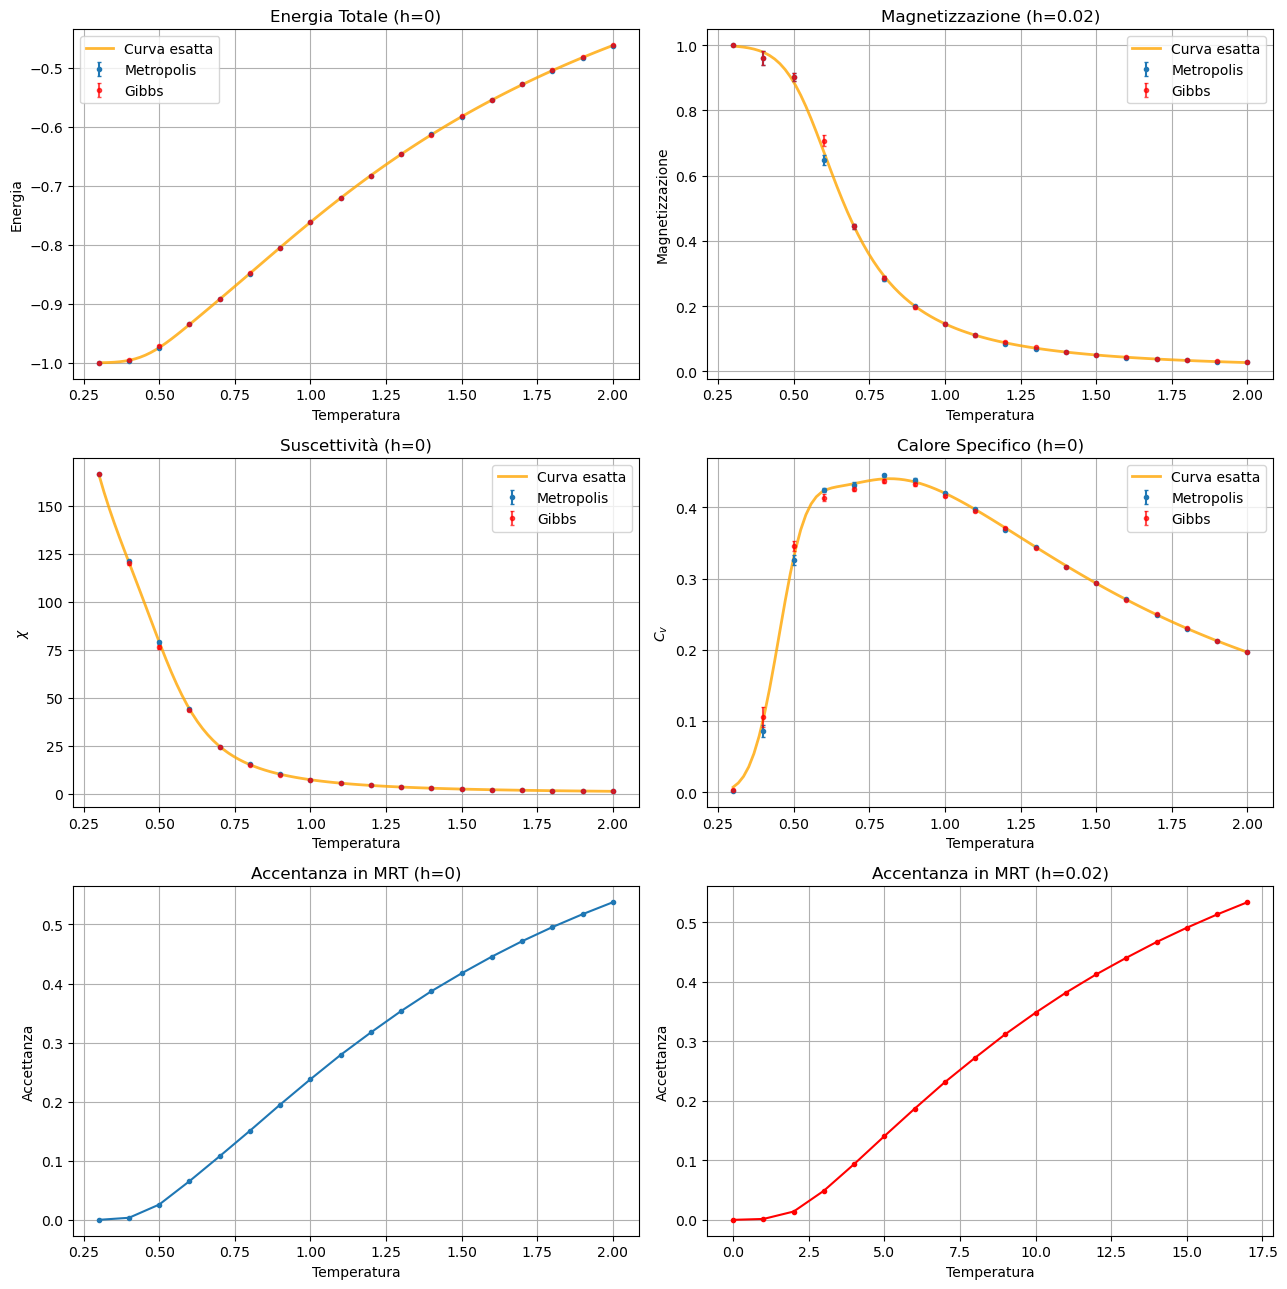

In [26]:
import matplotlib.pyplot as plt
import numpy as np

npart = 50.0
fig, axes = plt.subplots(3, 2, figsize=(13, 13))

# Parametri
points = 100
T = np.linspace(0.3, 2.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
h = 0.02  # campo esterno

th = np.tanh(J / T)
thN = th ** Ns
ch = 1 / th

# Energia totale
e = -J * (th + ch * thN) / (1 + thN)
axes[0, 0].plot(T, e, color='orange', linewidth=2, label='Curva esatta', alpha=0.8)
# Magnetizzazione (campo esterno piccolo)
b = beta
l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) * ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))) +
                                      (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))))) / Z
axes[0, 1].plot(T, M, color='orange', linewidth=2, label='Curva esatta', alpha=0.8)
# Suscettività
X = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)
axes[1, 0].plot(T, X, color='orange', linewidth=2, label='Curva esatta', alpha=0.8)
# Calore specifico
heat = ((beta * J) ** 2) * (((1 + thN + (Ns - 1) * (th ** 2) + (Ns - 1) * (ch ** 2) * thN) / (1 + thN)) - Ns * ((th + ch * thN) / (1 + thN)) ** 2)
axes[1, 1].plot(T, heat, color='orange', linewidth=2, label='Curva esatta', alpha=0.8)

# Caricamento dati METROPOLIS
temp, MRT_ten, MRT_err_ten = np.loadtxt("FINAL_RESULTS/tenergy_MRT_NOF.dat", delimiter=',', usecols=(0, 1, 2), unpack=True)
MRT_mag, MRT_err_mag = np.loadtxt("FINAL_RESULTS/mag_MRT_YESF.dat", delimiter=',', usecols=(1, 2), unpack=True)
MRT_chi, MRT_err_chi = np.loadtxt("FINAL_RESULTS/susc_MRT_NOF.dat", delimiter=',', usecols=(1, 2), unpack=True)
MRT_cv, MRT_err_cv = np.loadtxt("FINAL_RESULTS/cv_MRT_NOF.dat", delimiter=',', usecols=(1, 2), unpack=True)
MRT_acc_NOF = np.loadtxt("FINAL_RESULTS/acc_METRO_NOF.dat", unpack=True)
MRT_acc_YESF = np.loadtxt("FINAL_RESULTS/acc_METRO_YESF.dat", unpack=True)
# Caricamento dati GIBBS
GIBBS_ten, GIBBS_err_ten = np.loadtxt("FINAL_RESULTS/tenergy_GIBBS_NOF.dat", delimiter=',', usecols=(1, 2), unpack=True)
GIBBS_mag, GIBBS_err_mag = np.loadtxt("FINAL_RESULTS/mag_GIBBS_YESF.dat", delimiter=',', usecols=(1, 2), unpack=True)
GIBBS_chi, GIBBS_err_chi = np.loadtxt("FINAL_RESULTS/susc_GIBBS_NOF.dat", delimiter=',', usecols=(1, 2), unpack=True)
GIBBS_cv, GIBBS_err_cv = np.loadtxt("FINAL_RESULTS/cv_GIBBS_NOF.dat", delimiter=',', usecols=(1, 2), unpack=True)

# Energia Totale
axes[0,0].errorbar(temp, MRT_ten, yerr=MRT_err_ten, fmt='.', capsize=1.5, label="Metropolis")
axes[0,0].errorbar(temp, GIBBS_ten, yerr=GIBBS_err_ten, fmt='.', color='red', capsize=1.5, label="Gibbs", alpha =0.7)
axes[0,0].set_title("Energia Totale (h=0)")
axes[0,0].set_xlabel("Temperatura")
axes[0,0].set_ylabel("Energia")
axes[0,0].legend()
axes[0,0].grid(True)

# Magnetizzazione
axes[0,1].errorbar(temp, MRT_mag, yerr=MRT_err_mag, fmt='.', capsize=1.5, label="Metropolis")
axes[0,1].errorbar(temp, GIBBS_mag, yerr=GIBBS_err_mag, fmt='.', color='red', capsize=1.5, label="Gibbs", alpha =0.7)
axes[0,1].set_title("Magnetizzazione (h=0.02)")
axes[0,1].set_xlabel("Temperatura")
axes[0,1].set_ylabel("Magnetizzazione")
axes[0,1].legend()
axes[0,1].grid(True)

# Suscettività
axes[1,0].errorbar(temp, MRT_chi, yerr=MRT_err_chi, fmt='.', capsize=1.5, label="Metropolis")
axes[1,0].errorbar(temp, GIBBS_chi, yerr=GIBBS_err_chi, fmt='.', color='red', capsize=1.5, label="Gibbs", alpha =0.7)
axes[1,0].set_title("Suscettività (h=0)")
axes[1,0].set_xlabel("Temperatura")
axes[1,0].set_ylabel(r"$\chi$")
axes[1,0].legend()
axes[1,0].grid(True)

# Calore Specifico
axes[1,1].errorbar(temp, MRT_cv, yerr=MRT_err_cv, fmt='.', capsize=1.5, label="Metropolis")
axes[1,1].errorbar(temp, GIBBS_cv, yerr=GIBBS_err_cv, fmt='.', color='red', capsize=1.5, label="Gibbs", alpha =0.7)
axes[1,1].set_title("Calore Specifico (h=0)")
axes[1,1].set_xlabel("Temperatura")
axes[1,1].set_ylabel(r"$C_v$")
axes[1,1].legend()
axes[1,1].grid(True)

# Accentanza
axes[2,0].plot(temp, MRT_acc_NOF, marker='.', label="Metropolis")
axes[2,0].set_title("Accentanza in MRT (h=0)")
axes[2,0].set_xlabel("Temperatura")
axes[2,0].set_ylabel("Accettanza")
axes[2,0].grid(True)

axes[2,1].plot(MRT_acc_YESF, color='red', marker='.', label="Metropolis")
axes[2,1].set_title("Accentanza in MRT (h=0.02)")
axes[2,1].set_xlabel("Temperatura")
axes[2,1].set_ylabel("Accettanza")
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

Come è possibile vedere sopra, in ogni grafico:

* le curve dei dati provenienti dalla simulazione con il campionamento Metropolis
* le curve dei dati ottenuti con il campionamento Gibbs
* le curve teoriche derivate dalla soluzione analitica del modello  

si sovrappongono perfettamente entro le incertezze statistiche. Questo risultato conferma la correttezza dell’implementazione di entrambi gli algoritmi e la loro capacità di campionare correttamente la distribuzione di Boltzmann per il modello di Ising 1D. Nonostante le due tecniche si basino su approcci diversi (accettazione-rifiuto per Metropolis, campionamento diretto per Gibbs), entrambe risultano equivalenti.

In particolare:
+ il calore specifico $C(N,T)$ ha mostrato una maggiore sensibilità al rumore statistico, evidente anche dalle barre di errore sensibilmente più grandi rispetto a quelle associate alle altre osservabili.

+ La suscettibilità $\chi(N,T)$ e la magnetizzazione $M(N,T,h)$ sono risultate più stabili numericamente e meno soggette a fluttuazioni.

+ Inoltre, l’accettanza delle proposte di flip nel caso Metropolis si è rivelata fortemente dipendente dalla temperatura:
    * a bassa temperatura ($T \to 0$), dove il sistema tende a rimanere in uno stato ordinato, l’accettanza diminuisce sensibilmente ($acc \to 0$), poiché la maggior parte delle proposte comporta un aumento di energia e quindi viene rifiutata.
    * Alle alte temperature l’accettanza aumenta verso 1, indicando che quasi ogni flip è accettato, in accordo con il fatto che le differenze di energia $\Delta E$ contano poco, perché $\beta \Delta E$ è piccolo e quindi l’accettanza è alta quasi sempre.